In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import sklearn
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Import necessary modules
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


df = pd.read_csv('bank_term_option/train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [84]:
df.shape

(31647, 18)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [86]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 25)

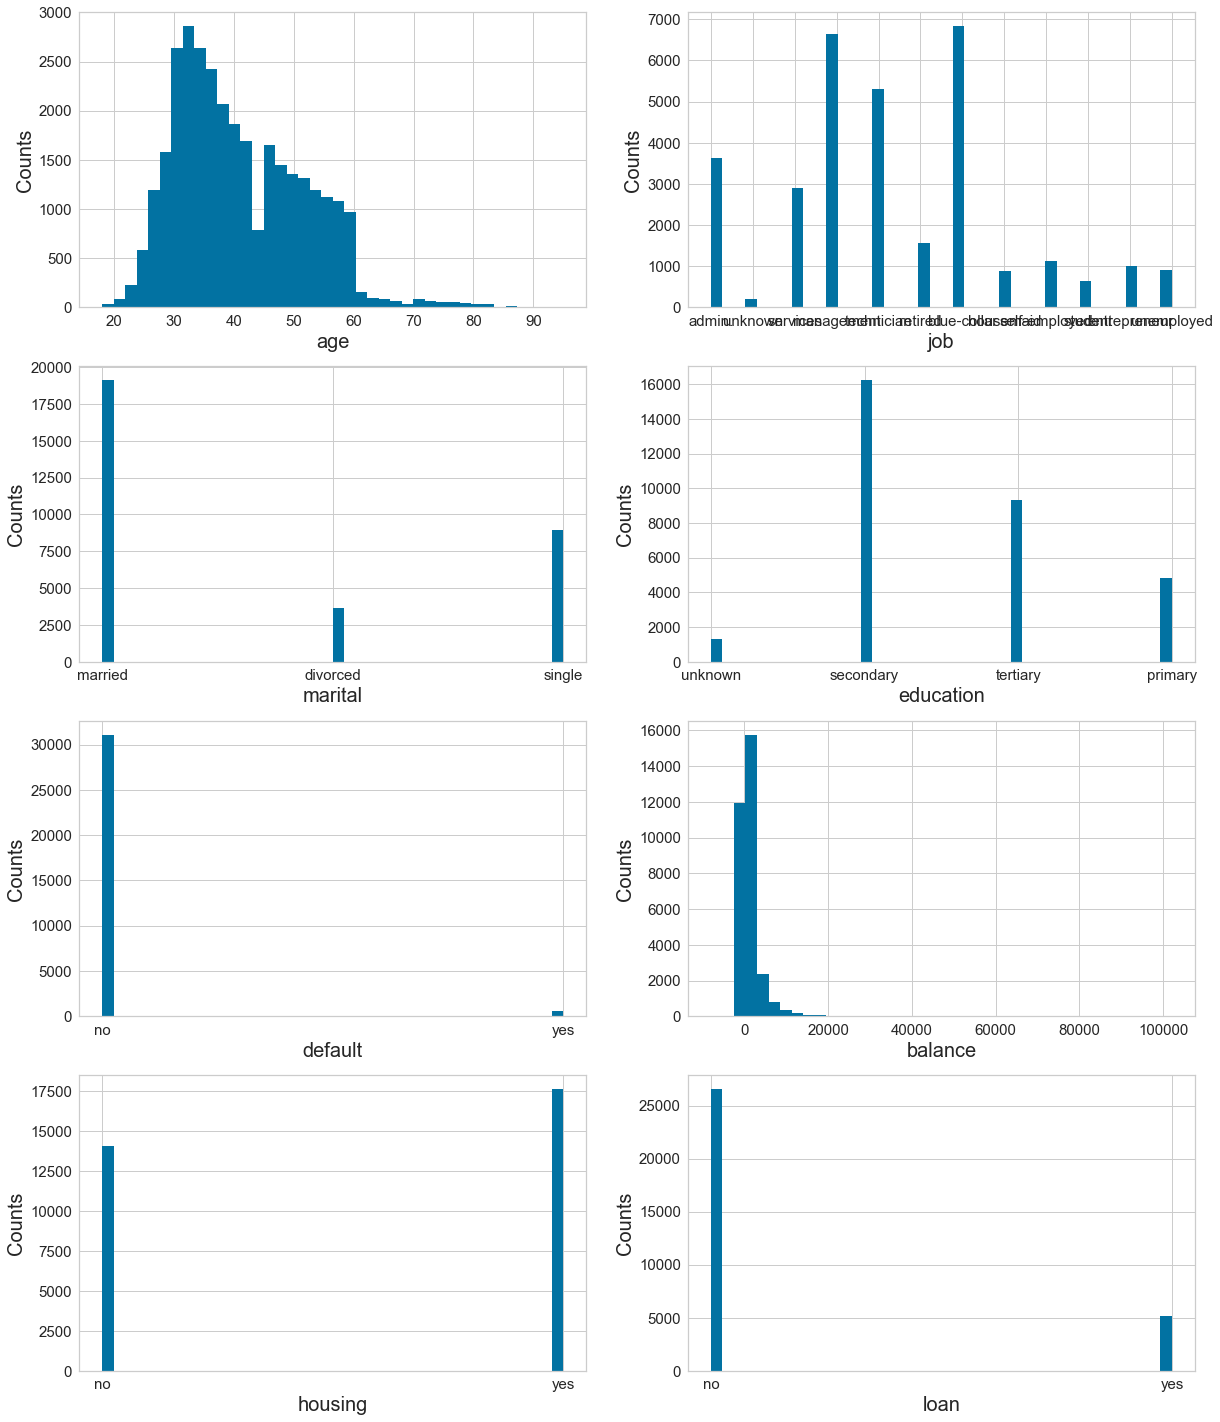

In [87]:
# make subplots of the means
fig, axes = plt.subplots(nrows = 4, ncols = 2)

# Specify the features of interest
num_features = ['age', 'job', 'marital','education','default', 
                'balance', 'housing','loan']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts','Counts', 'Counts', 'Counts', 'Counts','Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [88]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [89]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 25)

In [90]:
df.loc[(df.pdays < 0), 'pday'] = 0

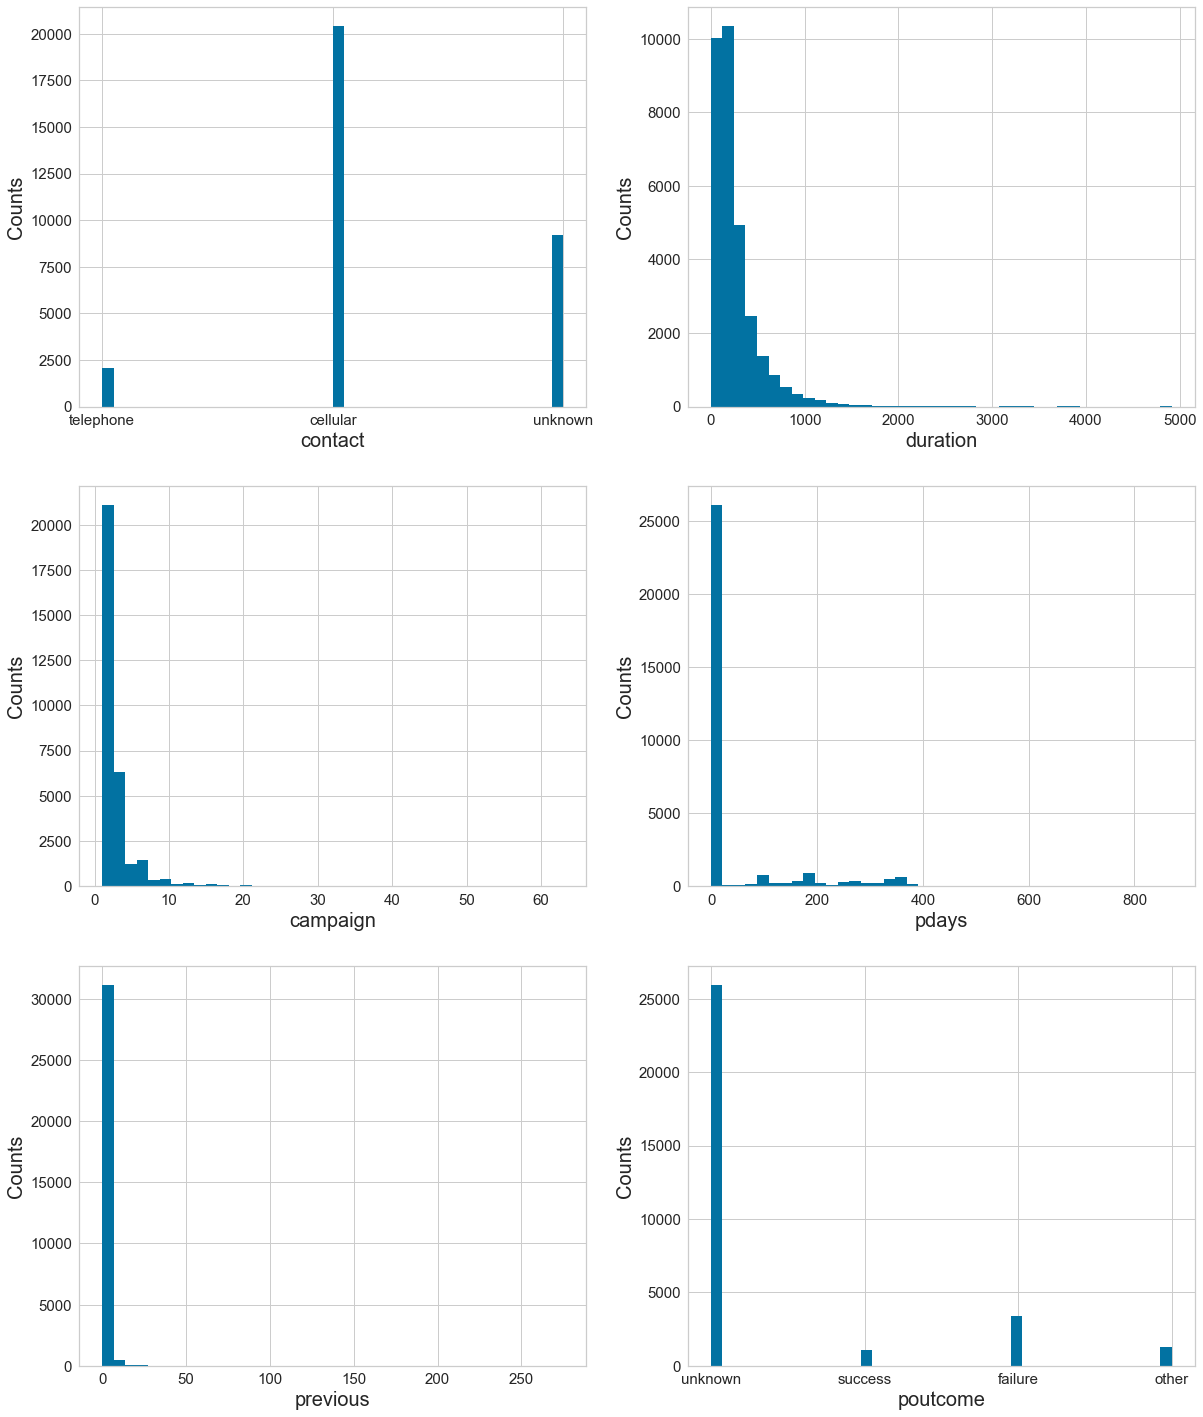

In [91]:
# make subplots of the means
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# Specify the features of interest
num_features = ['contact', 'duration', 'campaign','pdays','previous','poutcome']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts','Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

Text(0.5, 1.0, 'Distribution of Job Categories')

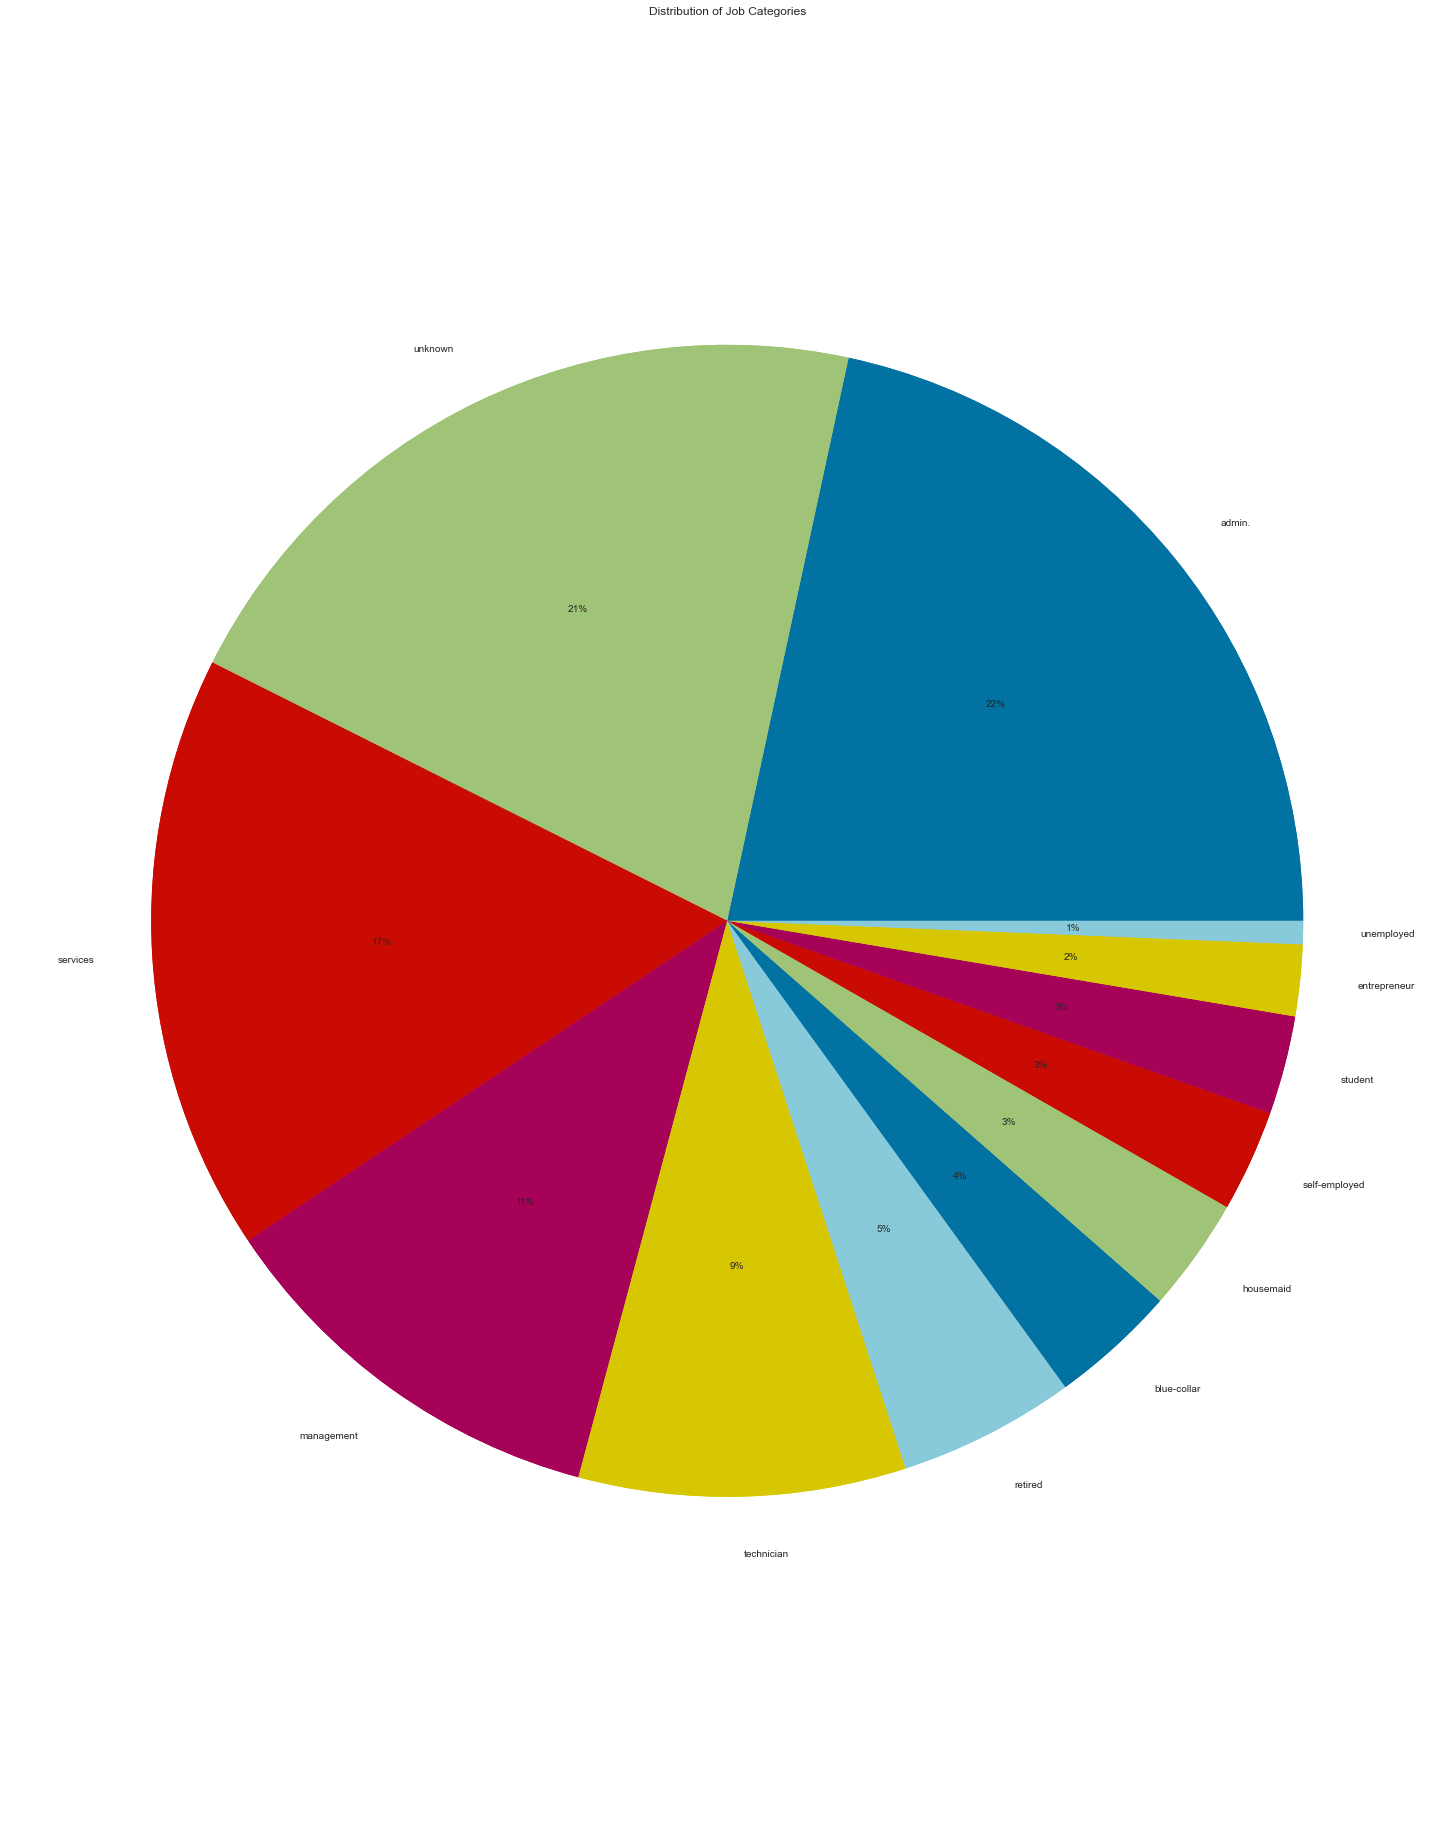

In [92]:
fig = plt.figure()
data = (df['job'].value_counts())
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed']
ax.pie(data, labels = langs,autopct='%1.0f%%')
plt.pie(data) 
plt.title('Distribution of Job Categories')

In [93]:
df_sub1 = df.replace({'subscribed': {'no': 0, 'yes': 1}})
df_sub1.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,pday
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0,0.0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0,0.0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0,0.0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1,NaN
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0,0.0


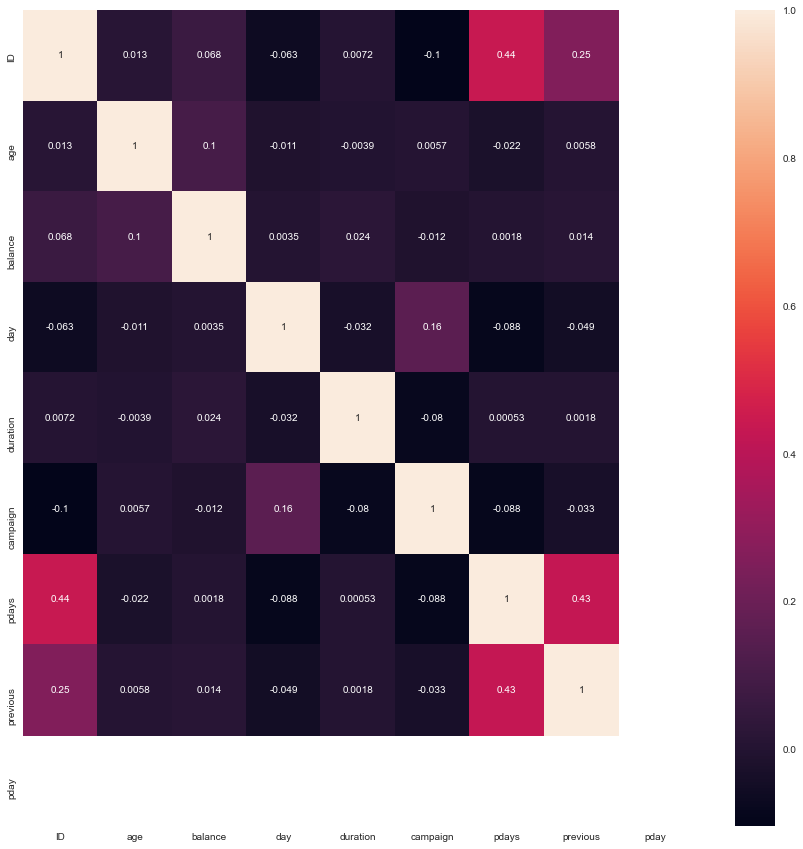

In [94]:
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

Look for missing values

In [95]:
df.isnull().sum()

ID               0
age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
subscribed       0
pday          5723
dtype: int64

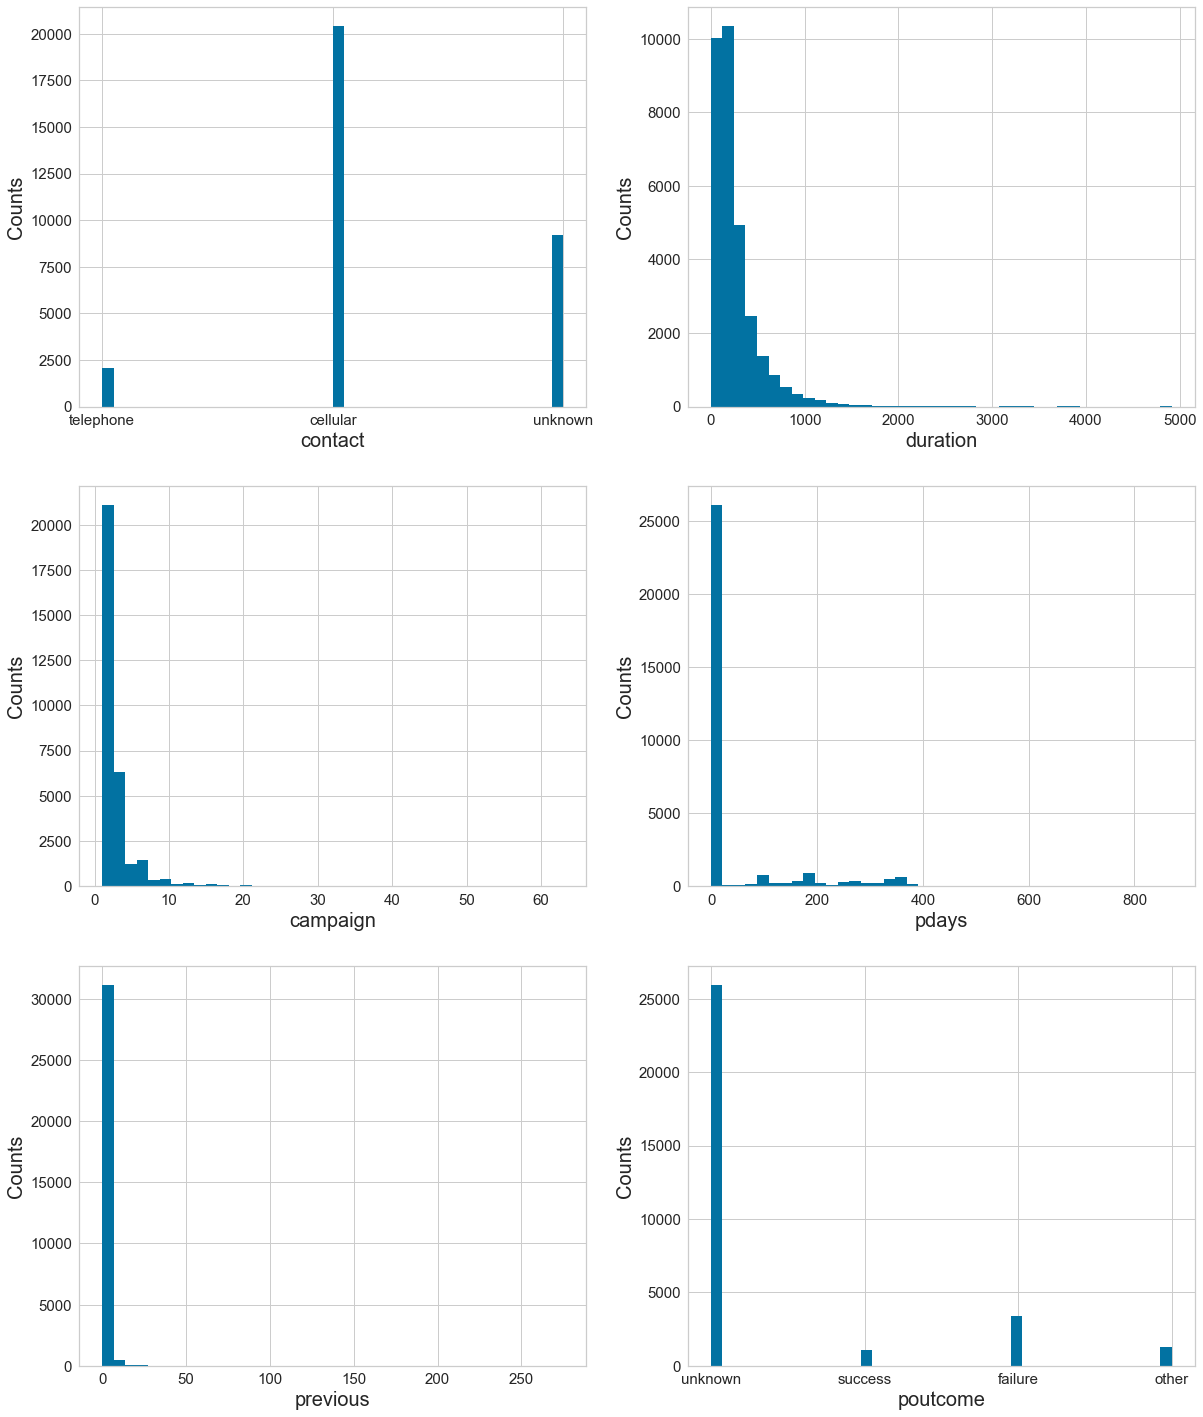

In [96]:
# make subplots of the means
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# Specify the features of interest
num_features = ['contact', 'duration', 'campaign','pdays','previous', 'poutcome']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts','Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

Find text variables. Will have to convert to numbers. Will find number of variables and hot encode the variables

In [97]:
df.job.unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [98]:
df = pd.get_dummies(df, columns=['job'], drop_first=True)

In [99]:
df.head()

,ID,age,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,26110,56,married,unknown,no,1933,no,no,telephone,19,...,0,0,0,0,0,0,0,0,0,0
1,40576,31,married,secondary,no,3,no,no,cellular,20,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,married,secondary,no,891,yes,no,cellular,18,...,0,0,0,0,0,1,0,0,0,0
3,43962,57,divorced,tertiary,no,3287,no,no,cellular,22,...,0,0,1,0,0,0,0,0,0,0
4,29842,31,married,secondary,no,119,yes,no,cellular,4,...,0,0,0,0,0,0,0,1,0,0


In [100]:
df.marital.unique()

array(['married', 'divorced', 'single'], dtype=object)

In [101]:
df = pd.get_dummies(df, columns=['marital'], drop_first=True)

In [102]:
df.head()

,ID,age,education,default,balance,housing,loan,contact,day,month,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
0,26110,56,unknown,no,1933,no,no,telephone,19,nov,...,0,0,0,0,0,0,0,0,1,0
1,40576,31,secondary,no,3,no,no,cellular,20,jul,...,0,0,0,0,0,0,0,1,1,0
2,15320,27,secondary,no,891,yes,no,cellular,18,jul,...,0,0,0,1,0,0,0,0,1,0
3,43962,57,tertiary,no,3287,no,no,cellular,22,jun,...,1,0,0,0,0,0,0,0,0,0
4,29842,31,secondary,no,119,yes,no,cellular,4,feb,...,0,0,0,0,0,1,0,0,1,0


In [103]:
df.education.unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [104]:
df = pd.get_dummies(df, columns=['education'], drop_first=True)

In [105]:
df.head()

,ID,age,default,balance,housing,loan,contact,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,26110,56,no,1933,no,no,telephone,19,nov,44,...,0,0,0,0,0,1,0,0,0,1
1,40576,31,no,3,no,no,cellular,20,jul,91,...,0,0,0,0,1,1,0,1,0,0
2,15320,27,no,891,yes,no,cellular,18,jul,240,...,1,0,0,0,0,1,0,1,0,0
3,43962,57,no,3287,no,no,cellular,22,jun,867,...,0,0,0,0,0,0,0,0,1,0
4,29842,31,no,119,yes,no,cellular,4,feb,380,...,0,0,1,0,0,1,0,1,0,0


In [106]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [107]:
df = pd.get_dummies(df, columns=['default'], drop_first=True)

In [108]:
df.head()

,ID,age,balance,housing,loan,contact,day,month,duration,campaign,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes
0,26110,56,1933,no,no,telephone,19,nov,44,2,...,0,0,0,0,1,0,0,0,1,0
1,40576,31,3,no,no,cellular,20,jul,91,2,...,0,0,0,1,1,0,1,0,0,0
2,15320,27,891,yes,no,cellular,18,jul,240,1,...,0,0,0,0,1,0,1,0,0,0
3,43962,57,3287,no,no,cellular,22,jun,867,1,...,0,0,0,0,0,0,0,1,0,0
4,29842,31,119,yes,no,cellular,4,feb,380,1,...,0,1,0,0,1,0,1,0,0,0


In [109]:
df.contact.unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [110]:
df = pd.get_dummies(df, columns=['contact'], drop_first=True)

In [111]:
df.head()

,ID,age,balance,housing,loan,day,month,duration,campaign,pdays,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,contact_telephone,contact_unknown
0,26110,56,1933,no,no,19,nov,44,2,-1,...,0,0,1,0,0,0,1,0,1,0
1,40576,31,3,no,no,20,jul,91,2,-1,...,0,1,1,0,1,0,0,0,0,0
2,15320,27,891,yes,no,18,jul,240,1,-1,...,0,0,1,0,1,0,0,0,0,0
3,43962,57,3287,no,no,22,jun,867,1,84,...,0,0,0,0,0,1,0,0,0,0
4,29842,31,119,yes,no,4,feb,380,1,-1,...,0,0,1,0,1,0,0,0,0,0


In [112]:
df.poutcome.unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [113]:
df = pd.get_dummies(df, columns=['poutcome'], drop_first=True)

In [114]:
df.head()

,ID,age,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,no,no,19,nov,44,2,-1,...,0,0,0,1,0,1,0,0,0,1
1,40576,31,3,no,no,20,jul,91,2,-1,...,0,1,0,0,0,0,0,0,0,1
2,15320,27,891,yes,no,18,jul,240,1,-1,...,0,1,0,0,0,0,0,0,0,1
3,43962,57,3287,no,no,22,jun,867,1,84,...,0,0,1,0,0,0,0,0,1,0
4,29842,31,119,yes,no,4,feb,380,1,-1,...,0,1,0,0,0,0,0,0,0,1


In [115]:
df.housing.unique()

array(['no', 'yes'], dtype=object)

In [116]:
df = pd.get_dummies(df, columns=['housing'], drop_first=True)

In [117]:
df.head()

,ID,age,balance,loan,day,month,duration,campaign,pdays,previous,...,education_secondary,education_tertiary,education_unknown,default_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,housing_yes
0,26110,56,1933,no,19,nov,44,2,-1,0,...,0,0,1,0,1,0,0,0,1,0
1,40576,31,3,no,20,jul,91,2,-1,0,...,1,0,0,0,0,0,0,0,1,0
2,15320,27,891,no,18,jul,240,1,-1,0,...,1,0,0,0,0,0,0,0,1,1
3,43962,57,3287,no,22,jun,867,1,84,3,...,0,1,0,0,0,0,0,1,0,0
4,29842,31,119,no,4,feb,380,1,-1,0,...,1,0,0,0,0,0,0,0,1,1


In [118]:
df = pd.get_dummies(df, columns=['loan'], drop_first=True)

In [119]:
df.head()

,ID,age,balance,day,month,duration,campaign,pdays,previous,subscribed,...,education_tertiary,education_unknown,default_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,housing_yes,loan_yes
0,26110,56,1933,19,nov,44,2,-1,0,no,...,0,1,0,1,0,0,0,1,0,0
1,40576,31,3,20,jul,91,2,-1,0,no,...,0,0,0,0,0,0,0,1,0,0
2,15320,27,891,18,jul,240,1,-1,0,no,...,0,0,0,0,0,0,0,1,1,0
3,43962,57,3287,22,jun,867,1,84,3,yes,...,1,0,0,0,0,0,1,0,0,0
4,29842,31,119,4,feb,380,1,-1,0,no,...,0,0,0,0,0,0,0,1,1,0


In [120]:
df = pd.get_dummies(df, columns=['subscribed'], drop_first=True)

In [121]:
df.head()

,ID,age,balance,day,month,duration,campaign,pdays,previous,pday,...,education_unknown,default_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,housing_yes,loan_yes,subscribed_yes
0,26110,56,1933,19,nov,44,2,-1,0,0.0,...,1,0,1,0,0,0,1,0,0,0
1,40576,31,3,20,jul,91,2,-1,0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,15320,27,891,18,jul,240,1,-1,0,0.0,...,0,0,0,0,0,0,1,1,0,0
3,43962,57,3287,22,jun,867,1,84,3,NaN,...,0,0,0,0,0,1,0,0,0,1
4,29842,31,119,4,feb,380,1,-1,0,0.0,...,0,0,0,0,0,0,1,1,0,0


Delete columns from dataframe

In [122]:
del df['ID']

In [123]:
del df['day']

In [124]:
del df['month']

In [125]:
df.head()

,age,balance,duration,campaign,pdays,previous,pday,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,housing_yes,loan_yes,subscribed_yes
0,56,1933,44,2,-1,0,0.0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,31,3,91,2,-1,0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,27,891,240,1,-1,0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,57,3287,867,1,84,3,NaN,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,31,119,380,1,-1,0,0.0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [126]:
df.shape

(31647, 32)

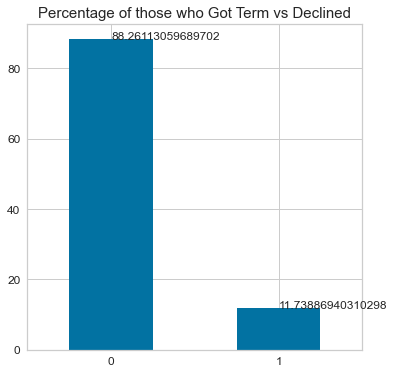

In [127]:
def_cnt = (df.subscribed_yes.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Percentage of those who Got Term vs Declined", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [128]:
df['subscribed_yes'].value_counts()

0    27932
1     3715
Name: subscribed_yes, dtype: int64

In [129]:
df['subscribed_yes'].shape

(31647,)

In [130]:
df.shape

(31647, 32)

In [131]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(1, inplace=True)

In [132]:
X = df.iloc[:,0:31]

In [133]:
X

,age,balance,duration,campaign,pdays,previous,pday,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,housing_yes,loan_yes
0,56,1933,44,2,-1,0,0.0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,31,3,91,2,-1,0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,27,891,240,1,-1,0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,57,3287,867,1,84,3,1.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,31,119,380,1,-1,0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,0,116,2,-1,0,0.0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
31643,53,380,438,2,-1,0,0.0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
31644,32,312,37,3,-1,0,0.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
31645,57,225,22,7,337,12,1.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [134]:
Y = df['subscribed_yes']

Let's resample the data to make it more even

In [135]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(X, Y)

In [136]:
X_resampled.shape

(56875, 31)

In [137]:
X_resampled.head()

,age,balance,duration,campaign,pdays,previous,pday,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,housing_yes,loan_yes
0,56,1933,44,2,-1,0,0.0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,31,3,91,2,-1,0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,27,891,240,1,-1,0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,57,3287,867,1,84,3,1.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,31,119,380,1,-1,0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [138]:
y_resampled.value_counts()

1    28943
0    27932
Name: subscribed_yes, dtype: int64

In [139]:
y_resampled.shape

(56875,)

In [140]:
# concatenating df1 and df2 along rows
df1 = pd.concat([X_resampled,y_resampled], axis=1)

In [141]:
df1.shape

(56875, 32)

In [142]:
df1.to_csv('test.csv')

In [143]:
df1.shape

(56875, 32)

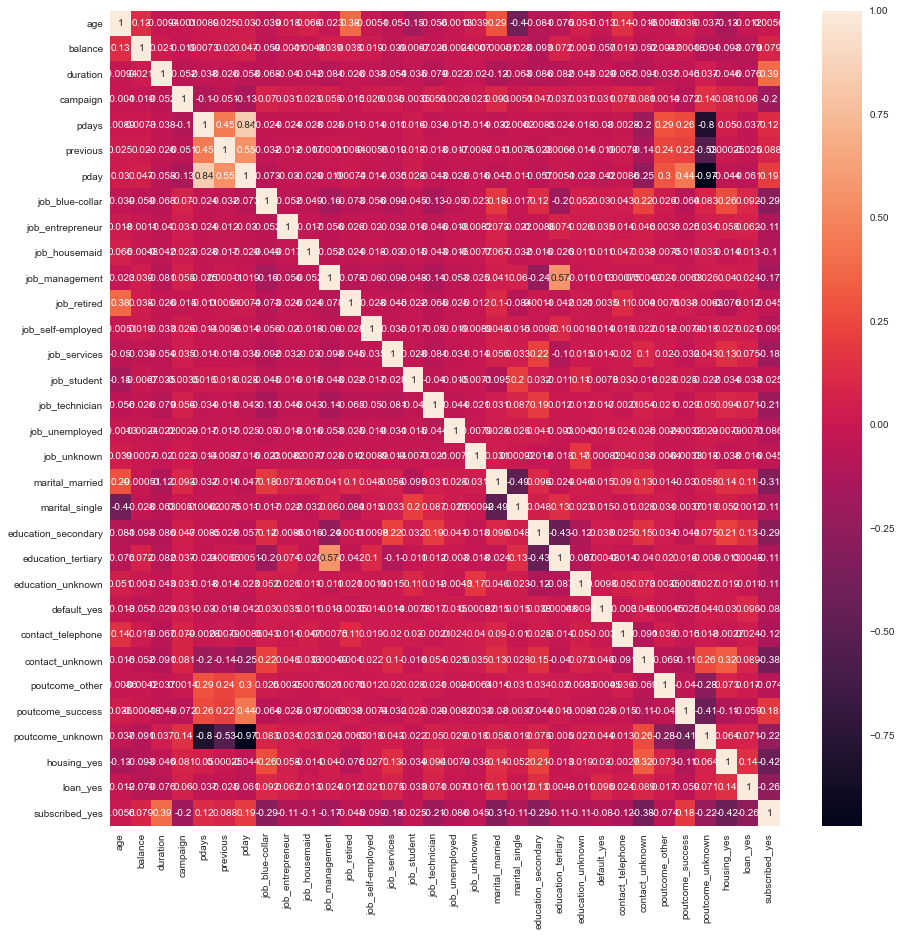

In [145]:
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True)
plt.show()

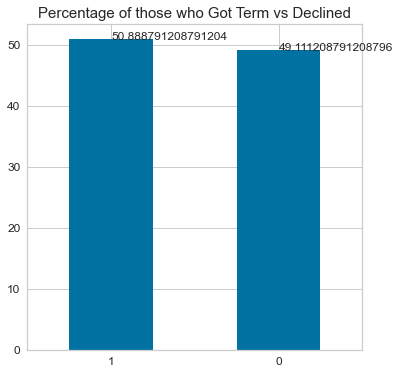

In [146]:
def_cnt = (df1.subscribed_yes.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Percentage of those who Got Term vs Declined", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

Use logistic regressioon

Need to do test split data

In [147]:
random_seed = 888
df_train, df_test = train_test_split(df1, test_size=0.3, random_state=random_seed)

In [148]:
df_train.shape

(39812, 32)

Use standardizer to normalize the data

In [149]:
from sklearn.preprocessing import StandardScaler


df_sub = df_train['subscribed_yes']
del df_train['subscribed_yes']

In [150]:
df_train.shape

(39812, 31)

In [151]:
df_sub.shape

(39812,)

In [152]:
df_sub.head()

36561    1
10710    0
27782    0
21050    0
37493    1
Name: subscribed_yes, dtype: uint8

In [153]:


#scale the data to standardize it for use in the model
scaler = StandardScaler()
scaler.fit(df_train)



X = scaler.transform(df_train)
y = df_sub

print(X.shape)
print(y.shape)

(39812, 31)
(39812,)


In [154]:
df_sub.shape

(39812,)

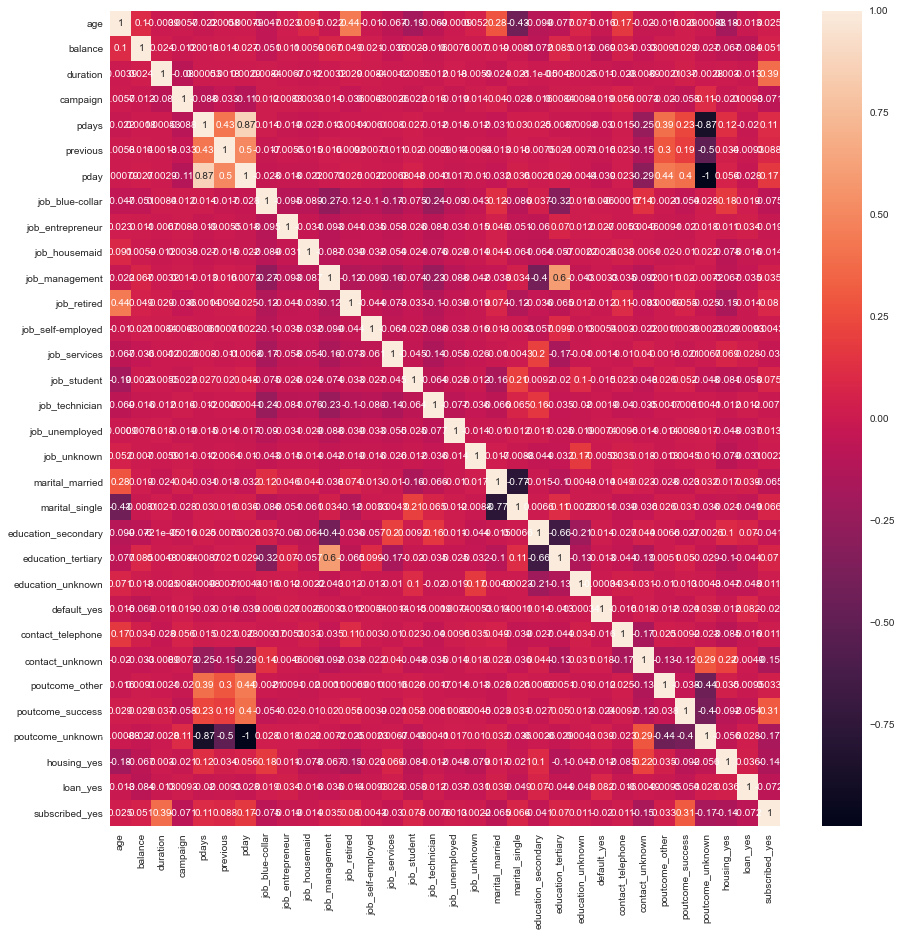

In [155]:
import seaborn as sns
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [156]:
#Create a logistic Regression model and fit the data to it
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")
model = logistic_regression.fit(X,y)

In [157]:
y_test = df_test['subscribed_yes']
del df_test['subscribed_yes']

scaler = StandardScaler()
scaler.fit(df_test)

X_test = scaler.transform(df_test)


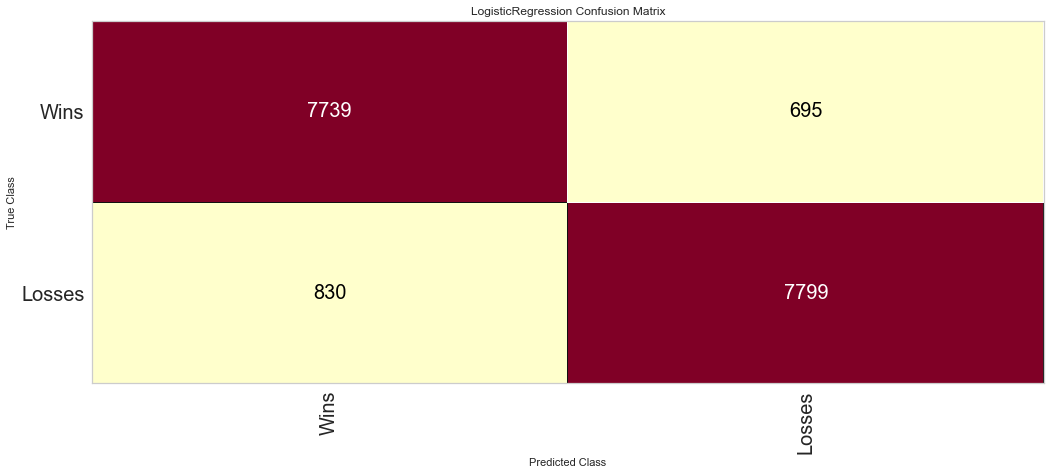

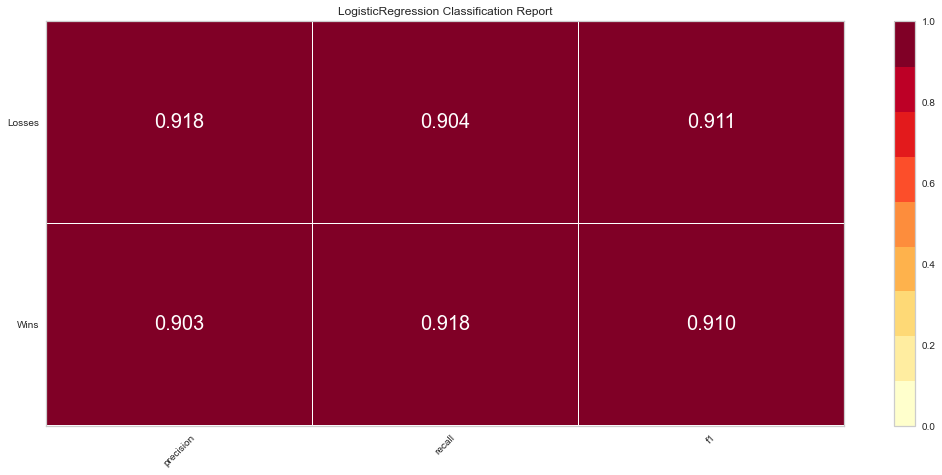

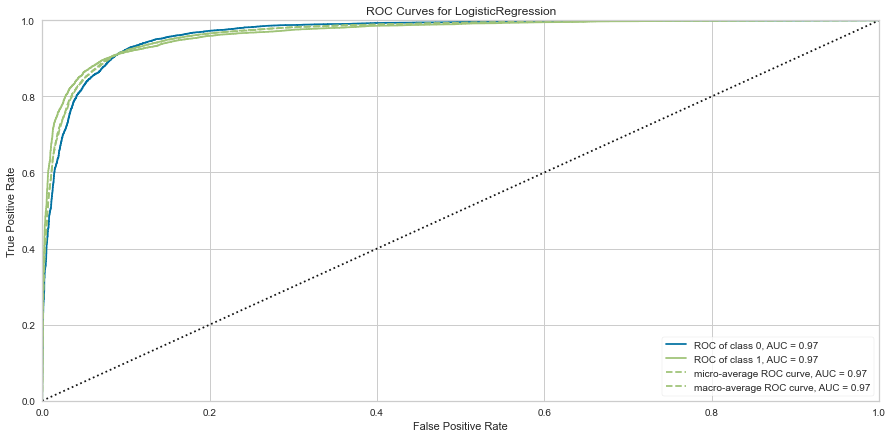

In [160]:
#Plot confusion matrix and classificatio report and ROC curves to 
#evaluate the data

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
#classes = ['Did Buy','Dig Not Buy']
classes = ['Wins','Losses']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X, y)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [159]:
#based on the prediction print the Classification Report
test_prob = model.predict_proba(X_test)[:, 1]
test_pred = model.predict(X_test)


print(confusion_matrix(y_test, test_pred))
print('\nClassification Report')
print(classification_report(y_test, test_pred))

[[7739  695]
 [ 830 7799]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      8434
           1       0.92      0.90      0.91      8629

    accuracy                           0.91     17063
   macro avg       0.91      0.91      0.91     17063
weighted avg       0.91      0.91      0.91     17063



In [77]:
#importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
 
# importing machine learning models for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# importing voting classifer
from sklearn.ensemble import VotingClassifier

In [78]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = RandomForestClassifier()
model_4 = GradientBoostingClassifier()
model_5 = DecisionTreeClassifier()

 
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3),('gbc',model_4)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X, y)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

C:\Users\dan35\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:02:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [79]:
# printing log loss between actual and predicted value
print(classification_report(pred_final, y_test))
print(confusion_matrix(pred_final, y_test))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      8644
           1       0.91      0.94      0.93      8419

    accuracy                           0.93     17063
   macro avg       0.93      0.93      0.93     17063
weighted avg       0.93      0.93      0.93     17063

[[7902  742]
 [ 532 7887]]


C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


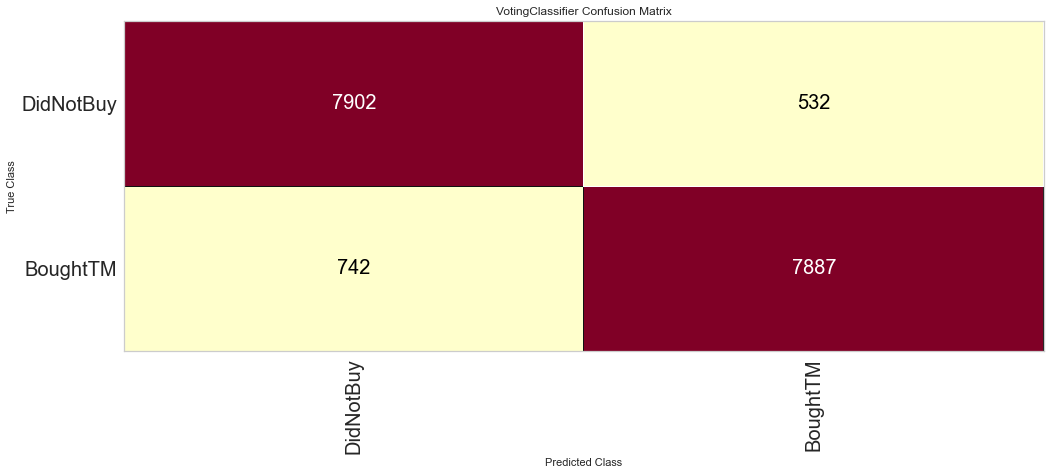

C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\dan35\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


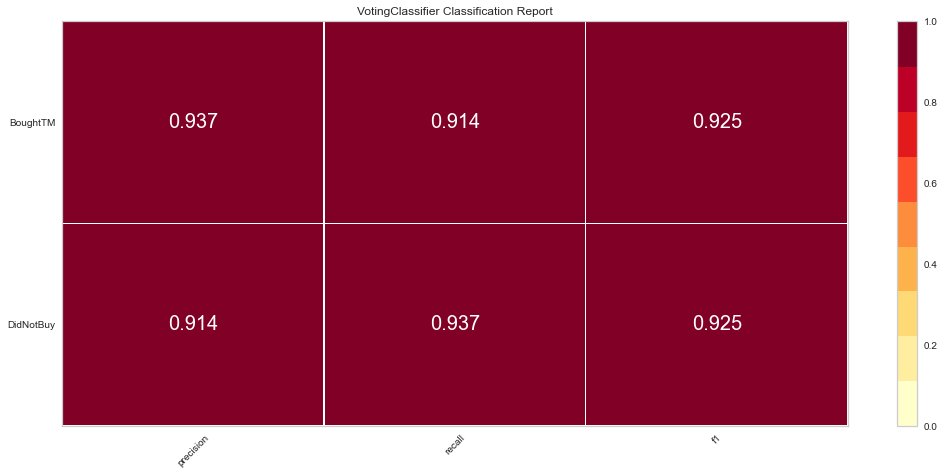

In [80]:
import yellowbrick
#Plot confusion matrix and classificatio report and ROC curves to 
#evaluate the data

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

#The ConfusionMatrix visualizer taxes a model
classes = ['DidNotBuy','BoughtTM']
cm = ConfusionMatrix(final_model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X, Y)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(final_model, classes=classes)

visualizer.fit(X, Y)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()